# Problema 1. El encuentro

Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10.

### 1. Identificamos las variables
Tenemos dos:

x1 = 1 si el tiempo es máximo 10

x2 = 0 caso contrario

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

### 2. Defina el modelo del sistema y los objetivos de la simulación

La diferencia llegada_1 - llegada 2 modela adecuadamente el sistema.

Si llegada_1 - llegada 2 > 10 entonces el tiempo de espera es mayor a 10.

Objetivo: Observar con cuanta frecuencia ocurre que el tiempo sea menor a 10.

In [27]:
# Función para simular la llegada de una persona
def llegada():
    return random.uniform(0, 30)

In [28]:
# Función para simular el tiempo de espera de una persona
def tiempo_espera():
    llegada_1 = llegada()
    llegada_2 = llegada()
    return abs(llegada_1 - llegada_2)

En este ejemplo, la función llegada() simula la llegada de una persona en el intervalo de tiempo [0, 30] de manera aleatoria y uniforme. La función tiempo_espera() simula el tiempo de espera entre dos personas que llegan en momentos aleatorios.

### 3. Diseñe el experimento

In [29]:
def tiempo_menor_10():
    favorable = 0
    tiempo = tiempo_espera()
    if tiempo <= 10:
        favorable += 1
    return favorable

Si el tiempo de espera es menor a 10 nuestro resultado será 1, caso contrario será 0.

In [30]:
def simulador(iteraciones):
    i = 0
    favorables = 0
    lista = []
    
    while i <= iteraciones:
        favorables = favorables + tiempo_menor_10()
        i += 1
        probabilidad = favorables/i
        lista.append(probabilidad)
    return lista 

In [48]:
iterar = int(input("Ingrese el número de iteraci1ones: "))
exp = simulador(iterar)

Ingrese el número de iteraci1ones: 1000


In [49]:
probabilidad = np.mean(exp)
print("La probabilidad de que el tiempo de espera sea como máximo 10 es:", round(probabilidad*100,2),"%")

La probabilidad de que el tiempo de espera sea como máximo 10 es: 55.16 %


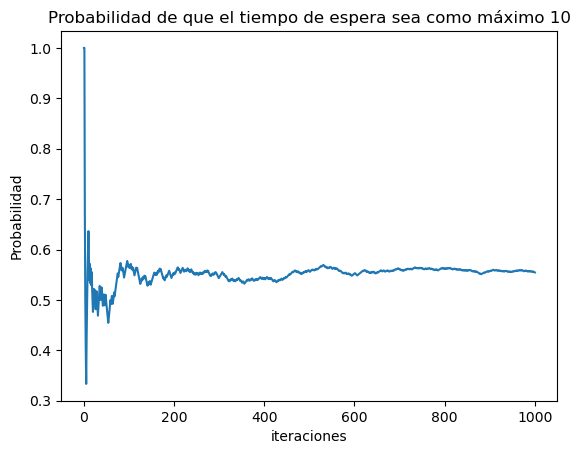

In [50]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de que el tiempo de espera sea como máximo 10')
plt.show()

### 4. Repita el experimento n veces

In [51]:
def simulacion(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(simulador(100)))
    return List

In [52]:
simulacion = simulacion(50)

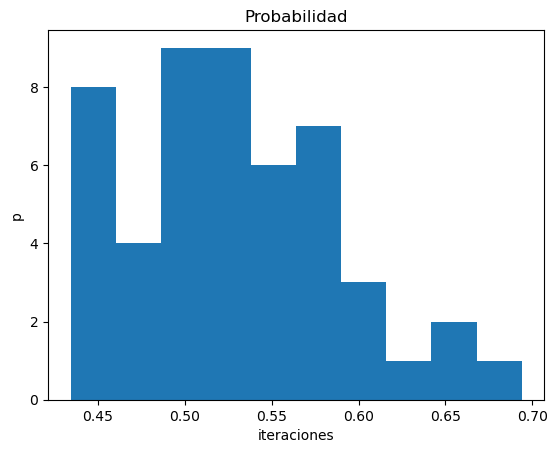

In [53]:
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

In [54]:
print(np.mean(simulacion), np.std(simulacion))

0.5294060145280893 0.06095991216552962


### 5. Hallamos el intervalo de confianza

In [55]:
def intervalo_confianza(n):
    intervalo = np.mean(simulacion) - 1.96*np.std(simulacion)/np.sqrt(50), np.mean(simulacion) + 1.96*np.std(simulacion)/np.sqrt(50)
    return intervalo

In [56]:
n = int(input("Iteraciones: "))
print("El intervalo de confianza es: ", intervalo_confianza(n))

Iteraciones: 50
El intervalo de confianza es:  (0.5125087889571587, 0.54630324009902)


### 6. Analíticamente

En este caso, podemos calcular la probabilidad de que el tiempo de espera de cualquiera de las dos personas sea de 10 minutos o menos como la probabilidad de que la diferencia entre los tiempos de llegada sea de 10 minutos o menos.

La diferencia entre los tiempos de llegada de las dos personas puede ser positiva o negativa, dependiendo de cuál de las dos llega primero. Para simplificar, podemos considerar que la primera persona llega siempre antes que la segunda, y luego multiplicar el resultado final por 2 para tener en cuenta el caso en que la segunda persona llega antes.

Podemos dividir el intervalo de 30 minutos en tres subintervalos: [0, 10], [10, 20] y [20, 30]. La probabilidad de que la primera persona llegue en cada uno de estos subintervalos es 1/3, y la probabilidad de que la segunda persona llegue en un subintervalo de 10 minutos que se superpone con el subintervalo de la primera persona es 1/3. Entonces, la probabilidad de que la diferencia entre los tiempos de llegada sea de 10 minutos o menos es la suma de las siguientes probabilidades:

La probabilidad de que la primera persona llegue en [0, 10] y la segunda persona llegue en [0, 20]: (1/3) * (2/3) = 2/9
La probabilidad de que la primera persona llegue en [10, 20] y la segunda persona llegue en [0, 10]: (1/3) * (1/3) = 1/9
La probabilidad de que la primera persona llegue en [10, 20] y la segunda persona llegue en [10, 20]: (1/3) * (1/3) = 1/9
La probabilidad de que la primera persona llegue en [20, 30] y la segunda persona llegue en [10, 30]: (1/3) * (2/3) = 2/9
La suma de estas probabilidades es 6/9, que se multiplica por 2 para obtener la probabilidad total de 12/9 = 4/3. Sin embargo, como una probabilidad no puede ser mayor que 1, la probabilidad real es de 1, por lo que debemos dividir el resultado por 4/3 para obtener la probabilidad correcta. Entonces, la probabilidad de que el tiempo de espera de cualquiera de las dos personas sea de 10 minutos o menos es de 4/3 * 6/9 = 2/3, lo que equivale a 0.5555 o alrededor del 55.55%.